In [1]:
import os
import pandas as pd
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendars import get_calendar
from zipline.utils.run_algo import load_extensions

# Load extensions.py; this allows you access to custom bundles
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)

# Set-Up Pricing Data Access
trading_calendar = get_calendar('CME')
bundle = 'futures'
bundle_data = bundles.load(bundle)

/anaconda3/envs/env_zipline/lib/python3.5/site-packages/empyrical/utils.py:32: UserWarning: Unable to import pandas_datareader. Suppressing import error and continuing. All data reading functionality will raise errors; but has been deprecated and will be removed in a later version.
  warnings.warn(msg)
<string>:261: UserWarning: Overwriting bundle with name 'futures'


In [2]:
bundle_data.asset_finder.futures_exchanges

Table('futures_exchanges', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-21T21;52;35.273413/assets-6.sqlite)), Column('exchange', TEXT(), table=<futures_exchanges>, primary_key=True, nullable=False), Column('timezone', TEXT(), table=<futures_exchanges>), schema=None)

In [3]:
bundle_data.asset_finder.futures_root_symbols

Table('futures_root_symbols', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-21T21;52;35.273413/assets-6.sqlite)), Column('root_symbol', TEXT(), table=<futures_root_symbols>, primary_key=True, nullable=False), Column('root_symbol_id', INTEGER(), table=<futures_root_symbols>), Column('sector', TEXT(), table=<futures_root_symbols>), Column('description', TEXT(), table=<futures_root_symbols>), Column('exchange', TEXT(), ForeignKey('futures_exchanges.exchange'), table=<futures_root_symbols>), schema=None)

In [4]:
data = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    future_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader,
)

In [5]:
bundle_data.asset_finder.futures_contracts

Table('futures_contracts', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-21T21;52;35.273413/assets-6.sqlite)), Column('sid', INTEGER(), table=<futures_contracts>, primary_key=True, nullable=False), Column('symbol', TEXT(), table=<futures_contracts>), Column('root_symbol', TEXT(), ForeignKey('futures_root_symbols.root_symbol'), table=<futures_contracts>), Column('asset_name', TEXT(), table=<futures_contracts>), Column('start_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('end_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('first_traded', INTEGER(), table=<futures_contracts>), Column('exchange', TEXT(), ForeignKey('futures_exchanges.exchange'), table=<futures_contracts>), Column('notice_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('expiration_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('auto_close_date', INTEGER(), table=<futures_contracts>, nullable=False), Column(

In [6]:
bundle_data.asset_finder.futures_root_symbols

Table('futures_root_symbols', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-21T21;52;35.273413/assets-6.sqlite)), Column('root_symbol', TEXT(), table=<futures_root_symbols>, primary_key=True, nullable=False), Column('root_symbol_id', INTEGER(), table=<futures_root_symbols>), Column('sector', TEXT(), table=<futures_root_symbols>), Column('description', TEXT(), table=<futures_root_symbols>), Column('exchange', TEXT(), ForeignKey('futures_exchanges.exchange'), table=<futures_root_symbols>), schema=None)

In [7]:
bundle_data.asset_finder.futures_exchanges

Table('futures_exchanges', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-21T21;52;35.273413/assets-6.sqlite)), Column('exchange', TEXT(), table=<futures_exchanges>, primary_key=True, nullable=False), Column('timezone', TEXT(), table=<futures_exchanges>), schema=None)

In [8]:
bundle_data.asset_finder.reload_symbol_maps()

In [24]:
fut = bundle_data.asset_finder.lookup_future_symbol('EDU2018')

In [25]:
bundle_data.asset_finder.futures_sids[0:10]

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [26]:
fut.to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2018-09-18 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2018-09-17 00:00:00+0000', tz='UTC'),
 'exchange': 'EXCH',
 'exchange_full': 'EXCH',
 'expiration_date': Timestamp('2019-12-20 00:00:00+0000', tz='UTC'),
 'first_traded': None,
 'multiplier': 1.0,
 'notice_date': Timestamp('2018-09-18 00:00:00+0000', tz='UTC'),
 'root_symbol': 'Z',
 'sid': 2811,
 'start_date': Timestamp('2018-01-02 00:00:00+0000', tz='UTC'),
 'symbol': 'EDU2018',
 'tick_size': 0.0001}

In [27]:

start_dt = pd.Timestamp('2018-01-02', tz='UTC', offset='C')
end_dt = pd.Timestamp('2018-07-25', tz='UTC', offset='C')

end_loc = trading_calendar.closes.index.get_loc(end_dt)
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
dat = data.get_history_window(
    assets=[fut],
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='close',
    data_frequency='daily'
)


/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: offset is deprecated. Use freq instead
  
/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: offset is deprecated. Use freq instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
dat

,Future(2811 [EDU2018])
2018-01-03 00:00:00+00:00,97.920
2018-01-04 00:00:00+00:00,97.895
2018-01-05 00:00:00+00:00,97.885
2018-01-08 00:00:00+00:00,97.885
2018-01-09 00:00:00+00:00,97.875
2018-01-10 00:00:00+00:00,97.875
2018-01-11 00:00:00+00:00,97.875
2018-01-12 00:00:00+00:00,97.850
2018-01-15 00:00:00+00:00,NaN
2018-01-16 00:00:00+00:00,97.825


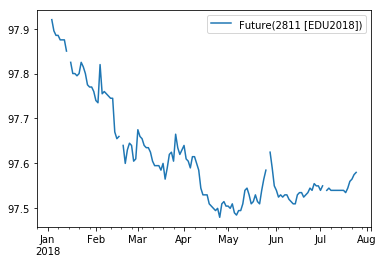

In [30]:
%matplotlib inline
dat.plot()

In [33]:
cf = bundle_data.asset_finder.create_continuous_future('Z', 0, 'calendar', None)

IndexError: bytearray index out of range

In [40]:
oc = bundle_data.asset_finder.get_ordered_contracts('SP')

{}